In [16]:
# NN = Neural Network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


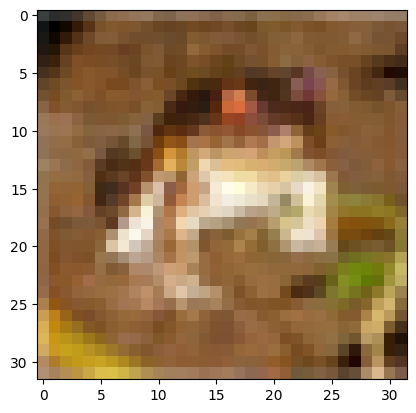

In [4]:
plt.imshow(x_train[0])

In [10]:
print("Shape of x_train =",x_train.shape)
print("Shape of y_train =",y_train.shape)
print("Shape of x_test =",x_test.shape)
print("Shape of y_test =",y_test.shape)
#32*32*3 = 3072

Shape of x_train = (50000, 32, 32, 3)
Shape of y_train = (50000, 1)
Shape of x_test = (10000, 32, 32, 3)
Shape of y_test = (10000, 1)


In [11]:
x_train_reshape = x_train.reshape(50000,3072) # convert it from 2D to 1D, (32*32*3 = 3072)
x_test_reshape = x_test.reshape(10000,3072)
# after reshape cannot be drawn again cause it converted to 1 colomn

#Normalization, cause acvtivation funct get y = (0,1) from x = (-5,5) and pixel are from 0 to 255
x_train_norm = x_train_reshape/255
x_test_norm = x_test_reshape/255

In [14]:
np.unique(y_train) # to know num of classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [24]:
model = Sequential()
model.add(Dense(128,activation="sigmoid",input_shape=(3072,))) # Input layer (50 parameters), inputshape = 32*32*3
model.add(Dense(128,activation="sigmoid")) # 1st hidden layer, 128 parameters
model.add(Dense(128,activation="sigmoid")) # 2st hidden layer, 128 parameters
model.add(Dense(128,activation="sigmoid")) # 3rd hidden layer, 128 parameters
model.add(Dense(128,activation="sigmoid")) # 4th hidden layer, 128 parameters
model.add(Dense(10,activation="softmax")) # Output layer, 10 parameters cause of 10 classes
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"]) # Back probagation
model.summary() # Show trianable parameters

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 460,682 (1.76 MB)

 Trainable params: 460,682 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(x_train_norm,y_train_cat,epochs=10,batch_size=50,validation_split=0.2)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.1501 - loss: 2.1800 - val_accuracy: 0.1894 - val_loss: 2.0473
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.1919 - loss: 2.0407 - val_accuracy: 0.2074 - val_loss: 2.0212
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.1964 - loss: 2.0230 - val_accuracy: 0.2020 - val_loss: 2.0276
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.2066 - loss: 2.0071 - val_accuracy: 0.2126 - val_loss: 1.9912
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.2373 - loss: 1.9654 - val_accuracy: 0.2517 - val_loss: 1.9632
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.2627 - loss: 1.9381 - val_accuracy: 0.2808 - val_loss: 1.9347
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.2826 - loss: 1.9034 - val_accuracy: 0.2821 - val_loss: 1.8962
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.2903 - loss: 1.8649 - 

In [26]:
## CNN = Convolutional Neural Network
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [27]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # same data above

In [28]:
x_train_norm = x_train/255
x_test_norm = x_test/255
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [29]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
# feature extraction leed to less parameter in input so small no of parameter in total and high acc and speed

model.add(Dense(128,activation="sigmoid")) # 1st hidden layer, 128 parameters
model.add(Dense(128,activation="sigmoid")) # 2nd hidden layer, 128 parameters
model.add(Dense(128,activation="sigmoid")) # 3rd hidden layer, 128 parameters
model.add(Dense(128,activation="sigmoid")) # 4th hidden layer, 128 parameters
model.add(Dense(128,activation="sigmoid")) # 5th hidden layer, 128 parameters
model.add(Dense(10,activation="softmax")) # Output layer, 10 parameters cause of 10 classes
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"]) # Back probagation
model.summary() # Show trianable parameters

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 381,770 (1.46 MB)

 Trainable params: 381,770 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(x_train_norm,y_train_cat,epochs=10,batch_size=50,validation_split=0.2)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 63s 75ms/step - accuracy: 0.1617 - loss: 2.1309 - val_accuracy: 0.3137 - val_loss: 1.7563
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 60s 74ms/step - accuracy: 0.3485 - loss: 1.6796 - val_accuracy: 0.4385 - val_loss: 1.4887
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.4669 - loss: 1.4334 - val_accuracy: 0.5092 - val_loss: 1.3503
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 79s 71ms/step - accuracy: 0.5320 - loss: 1.2730 - val_accuracy: 0.5337 - val_loss: 1.2945
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 58s 72ms/step - accuracy: 0.5742 - loss: 1.1567 - val_accuracy: 0.5590 - val_loss: 1.2209
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 82s 72ms/step - accuracy: 0.6147 - loss: 1.0553 - val_accuracy: 0.5779 - val_loss: 1.1826
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step - accuracy: 0.6477 - loss: 0.9709 - val_accuracy: 0.5918 - val_loss: 1.1577
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 85s 75ms/step - accuracy: 0.6757 - loss: 0.8909 - 

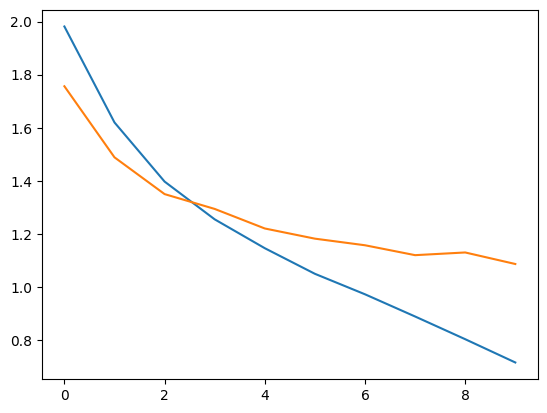

In [31]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

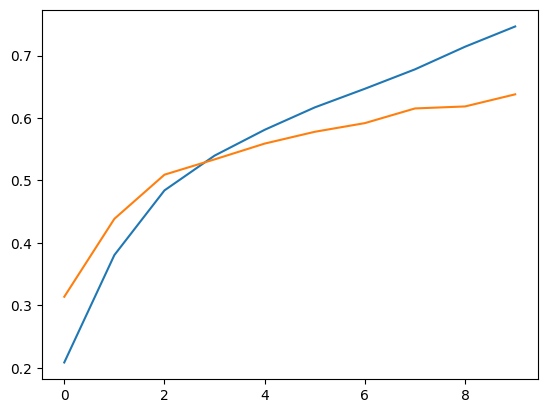

In [32]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])